# Exploração dos Dados - Desafio AI Girls

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [2]:
# Importando o arquivo do dataset, gerando um DataFrame
full_data = pd.read_csv('student-mat-copy1_TEST.csv')
full_data.shape

(395, 33)

In [3]:
full_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
# Informações gerais dos valores não categóricos
full_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
# Verificando se há valores nulos
full_data.info()

# Nesse dataset não há valores nulos :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

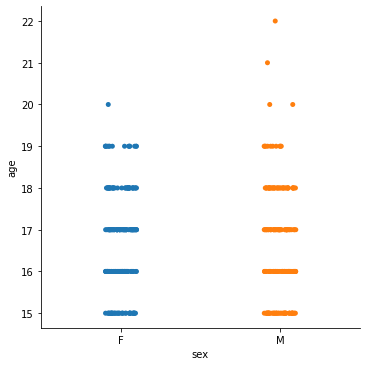

In [61]:
# Alunos por gênero
sns.catplot(x='sex',
            y='age',
           data=full_data)

In [74]:
# Idade por gênero em tabela
age_sex = pd.crosstab(full_data['sex'],
            full_data['age']).apply(lambda r: r/r.sum(), 
                                    axis=1)*100
age_sex

age,15,16,17,18,19,20,21,22
sex,,,,,,,,
F,18.269231,25.961538,27.884615,20.673077,6.730769,0.480769,0.000000,0.000000
M,23.529412,26.737968,21.390374,20.855615,5.347594,1.069519,0.534759,0.534759


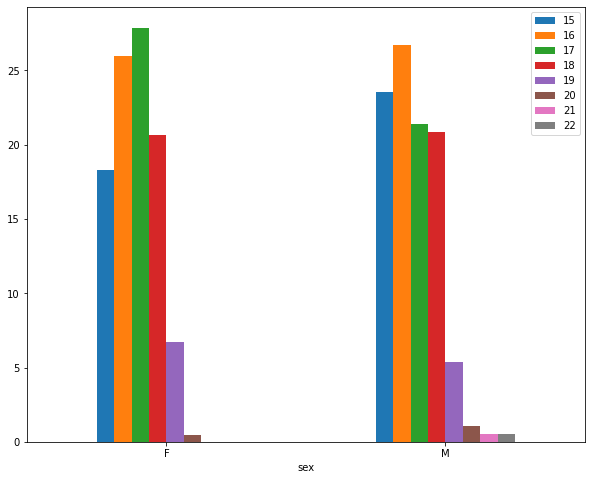

In [84]:
age_sex.plot.bar(rot=0 ,figsize=(10,8))
plt.legend();

# Com esse gráfico é possível ver que a maioria dos alunos tem idade entre 16 e 17 anos independente do gênero, são adolescentes mais velhos.
# Mas a maioria são mulheres de 17 anos

In [88]:
# Gênero por escola
age_school = pd.crosstab(full_data['sex'],
            full_data['school'])
age_school

school,GP,MS
sex,,
F,183,25
M,166,21


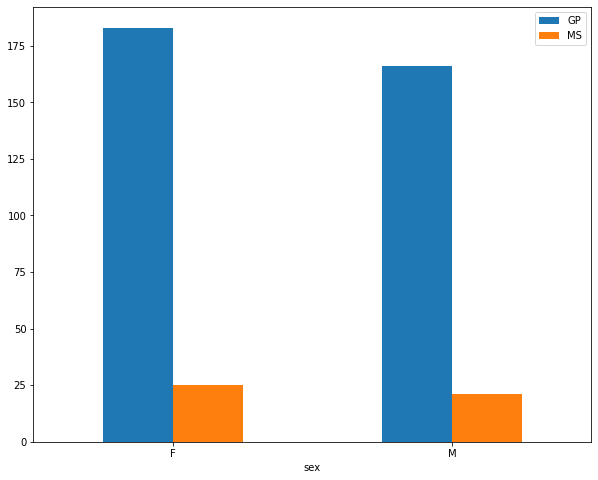

In [89]:
age_school.plot.bar(rot=0 ,figsize=(10,8))
plt.legend();

In [126]:
# Tempo médio de estudo por escola
study_time_school = pd.crosstab(full_data['studytime'].mean(),
            full_data['school']).apply(lambda r: r/r.sum(), 
                                    axis=1)*100
study_time_school

school,GP,MS
row_0,,
2.035443,88.35443,11.64557


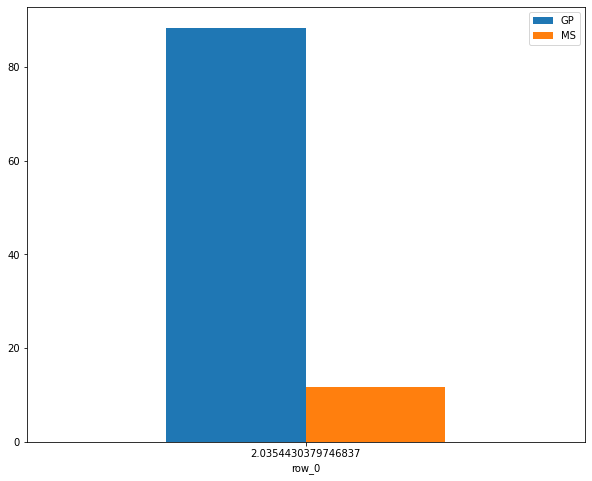

In [127]:
study_time_school.plot.bar(rot=0 ,figsize=(10,8))
plt.legend();

In [130]:
# Lição de casa por escola
activit_school = pd.crosstab(full_data['activities'],
            full_data['school']).apply(lambda r: r/r.sum(), 
                                    axis=1)*100
activit_school

school,GP,MS
activities,,
no,84.536082,15.463918
yes,92.039801,7.960199


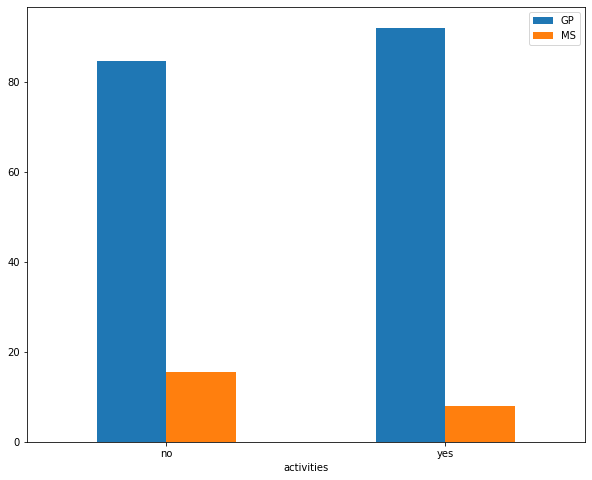

In [131]:
activit_school.plot.bar(rot=0 ,figsize=(10,8))
plt.legend();

In [132]:
# Lição de casa por gênero
activit_school_sex = pd.crosstab(full_data['activities'],
            full_data['sex']).apply(lambda r: r/r.sum(), 
                                    axis=1)*100
activit_school_sex

sex,F,M
activities,,
no,57.731959,42.268041
yes,47.761194,52.238806


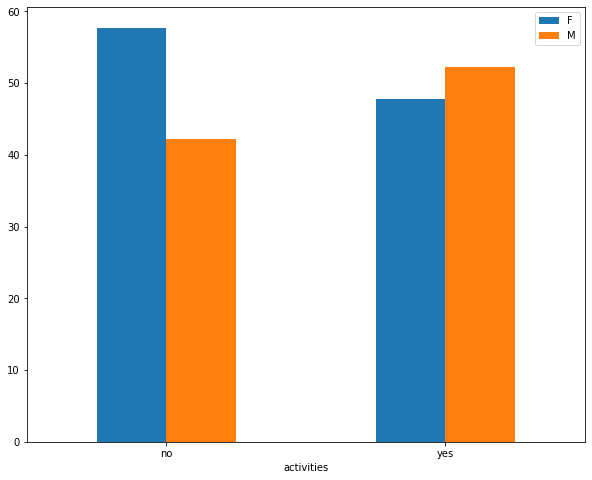

In [133]:
activit_school_sex.plot.bar(rot=0 ,figsize=(10,8))
plt.legend();